#### This is a [jupyter](https://jupyter.org/) notebook that contains text, equations, images and executable code in one document.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
%matplotlib inline
sy.init_printing(use_latex=True)

# Finite Elements: Element Matrices
Starting with the Helmholtz equation and using the principle of weighted residuals we arrive at the weak form

\begin{equation}
\int_\Omega \nabla \underline w \nabla \underline p \;\mathrm d\Omega -
k^2 \int_\Omega \underline w \underline p \;\mathrm d\Omega =
\int_\Gamma \underline w \nabla \underline p \;\mathrm d\vec\Gamma
\end{equation}

with the unknown sound pressure $\underline p$ (trial function) and the test function $\underline w$. Using Galerkin's approach, both the trial function and the test function are approximated using the same interpolation functions. For one finite element, this is 

\begin{gather}
 \hat{\underline p} = \mathbf{N}^T \mathbf{p},\qquad
\nabla  \hat{\underline p}=
\underbrace{\left(
 \begin{array}~
  \frac\partial{\partial x}\\ 
  \frac\partial{\partial y}\\ 
  \frac\partial{\partial z} 
 \end{array}
\right)
\mathbf{N}^T}_{\mathbf{\nabla N}^T} \mathbf{p} =
\mathbf{\nabla N}^T \mathbf{p}\\
\hat{\underline w} = \mathbf{N}^T \mathbf{w},\qquad
\nabla  \hat{\underline w}=\mathbf{\nabla N}^T \mathbf{w}
\end{gather}.

If we apply the weak form to just one finite element, we get

\begin{equation}
\left(\int_\Omega \mathbf{\nabla N} \mathbf{\nabla N}^T
\;\mathrm d\Omega \right)\mathbf{p}-
k^2 \left(\int_\Omega \mathbf{N}\mathbf{N}^T \;\mathrm d\Omega\right) \mathbf{p} =
\int_\Gamma \mathbf{N} \underbrace{\nabla \underline p \;\mathrm d\vec\Gamma}_{-\mathrm j \omega \rho_0  \mathrm{d} v_n}.
\end{equation}

While the right hand side is given from the boundary conditions (Neumann B.C.), the left hand side integrals have to be computed.

###  Example: 1D linear finite elements
As a first example, we use 1D linear finite elements. In this case, the two-node element has linear shape functions $N_1=\frac12(1-r)$ and $N_2=\frac12(1+r)$. Then, we can compute $\mathbf{N}$ and $\mathbf{\nabla N}$ in local coordinates:

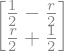

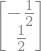

In [2]:
from sympy.abc import r,s, c, l
from sympy.matrices import Matrix
N1 = sy.Rational(1,2) * (1-r) # shape functions
N2 = sy.Rational(1,2) * (1+r) 
N = Matrix([[N1,],[N2,]])
nablaN = N.jacobian(Matrix([r,]))
display(N,nablaN)

where the _Rational_ expression is used to ensure that the fraction $\frac 1 2$ are not canceled out. Now the the integrands for the integrals in the weak form can also be evaluated:

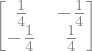

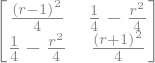

In [3]:
ig1 = sy.simplify(nablaN*nablaN.T) # first integrand
ig2 = sy.simplify(N*N.T) # second integrand
display(ig1,ig2)

The integrands are of zeroth and second order, so it is sufficient to use a 2nd order gauss rule for the integration (in this special case, we could even do it analytically):

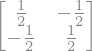

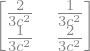

In [4]:
def integrate_gauss_2_1d(ig):
    gsp = sy.sqrt(sy.Rational(1,3)) # 1/sqrt(3) , gauss 2nd order points
    Igs = np.zeros_like(ig)
    for ri in (-gsp,gsp):
        Igs += ig.subs({r:ri})
    return Igs

K = integrate_gauss_2_1d(ig1) # stiffness matrix
M = sy.simplify(integrate_gauss_2_1d(ig2)/c**2) # mass matrix
display(K,M)

These are the element matrices in local coordinates:

\begin{equation}
\mathbf{K_{el}}\mathbf{p}-
\omega^2 \mathbf{M_{el}} \mathbf{p} =
\int_\Gamma \mathbf{N} \underbrace{\nabla \underline p \;\mathrm d\vec\Gamma}_{-\mathrm j \omega \rho_0  \mathrm{d} v_n}.
\end{equation}

Because of an analogy to mechanics, they are called the stiffness matrix $\mathbf K$ and the mass matrix $\mathbf M$. Note that the mass matrix also incorporates a factor $\frac{1}{c^2}$ that was part of the $k^2$ before. Now, we need those matrices in global coordinates. We assume that the element stretches from $x_1=0$ to $x_2=l$. For the integration we need the Jacobian determinant, which is just a 1 by 1 matrix, or scalar, in this case. Additionally we note that we have to multiply the gradient $\mathbf{\nabla N}$ by the inverse of the Jacobian to go from local to global coordinates.

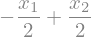

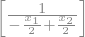

In [5]:
x1, x2 = sy.symbols("x1 x2")
x = N1*x1 + N2*x2 
J = Matrix([x,]).jacobian(Matrix([r,]))
display(J,J.det(),J.inv()) # the Jacobian matrix, its determinant and its inverse

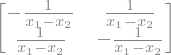

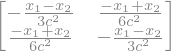

In [6]:
K = sy.simplify(integrate_gauss_2_1d( nablaN*J.inv() * J.inv().T*nablaN.T * J.det()))
M = sy.simplify(integrate_gauss_2_1d(ig2*J.det())/c**2)
display(K,M) # the integrals in global coordinates

After the integration, we now have the matrices in global coordinates. Because the absolute values for $x_1$ and $x_2$ do not matter (but only the difference), we can substitute the length to get the final result.

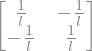

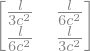

In [7]:
from sympy.abc import l
element = {x1:0,x2:l}
Kg = K.subs(element)
Mg = M.subs(element)
display(Kg,Mg)

This is now the final result for the one-dimensional element matrices. The same way we one can compute those matrices for higher dimensional and higher order elements.

#### License

This notebook is an [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use it for your own purposes. The text and the images are licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), and any code under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Ennes Sarradj, Numerical Acoustics: Finite Elements: Element Matrices Derivation, 2019.